# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/joeai/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


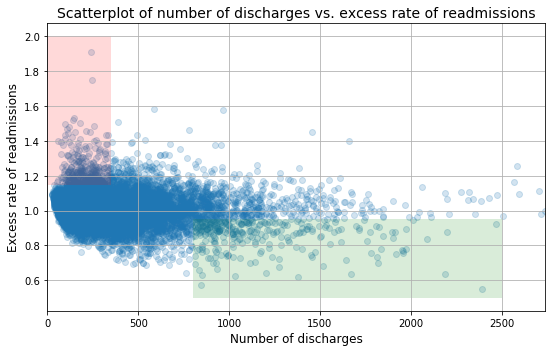

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

In [6]:
clean_hospital_read_df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

Text(0.5, 1.0, 'Scatterplot of number of discharges vs. number of readmissions')

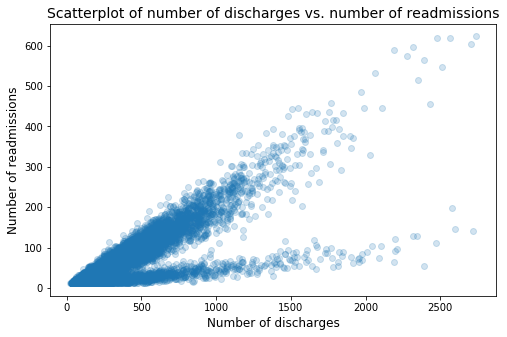

In [7]:
x1 = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y1 = list(clean_hospital_read_df['Number of Readmissions'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x1, y1, alpha=0.2)

ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Number of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. number of readmissions', fontsize=14)

## Observation

When we look at the total number of readmissions (versus the excess rate) we can see there are two diverging paths, one with a greater slope and one with a flatter slope. The former has a higher total number of readmissions as the number of discharges increase, while the latter slope is significantly flatter with the number of readmissions largely staying below 100 despite increasing number of discharges. 

What is going on here? 

There looks to be two groups here, so let's try and figure out what distinguishes the hospitals that are in the upper slope versus the lower slope. 

In [8]:
clean_hospital_read_df['State'].value_counts().reset_index()

,index,State
0,CA,944
1,TX,892
2,FL,706
3,NY,592
4,PA,548
5,IL,542
6,OH,487
7,MI,365
8,GA,358
9,NC,331


Text(0.5, 1.0, 'Scatterplot of number of discharges vs. number of readmissions (CA)')

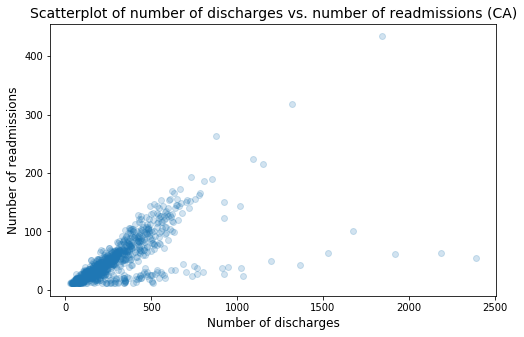

In [9]:
# make dataframe for CA
ca_df = clean_hospital_read_df[clean_hospital_read_df['State'] == 'CA']

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(ca_df['Number of Discharges'], ca_df['Number of Readmissions'], alpha = 0.2)

ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Number of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. number of readmissions (CA)', fontsize=14)

Text(0.5, 1.0, 'Scatterplot of number of discharges vs. number of readmissions (TX)')

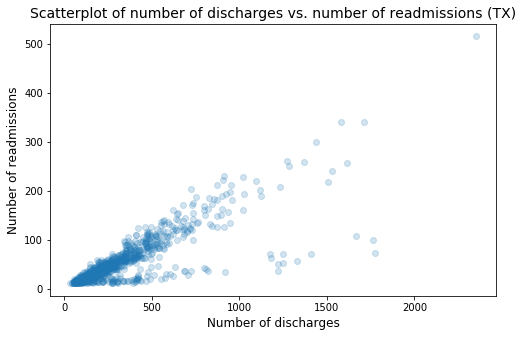

In [10]:
# make data frame for TX
tx_df = clean_hospital_read_df[clean_hospital_read_df['State'] == 'TX']

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(tx_df['Number of Discharges'], tx_df['Number of Readmissions'], alpha = 0.2)

ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Number of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. number of readmissions (TX)', fontsize=14)

Text(0.5, 1.0, 'Scatterplot of number of discharges vs. number of readmissions (FL)')

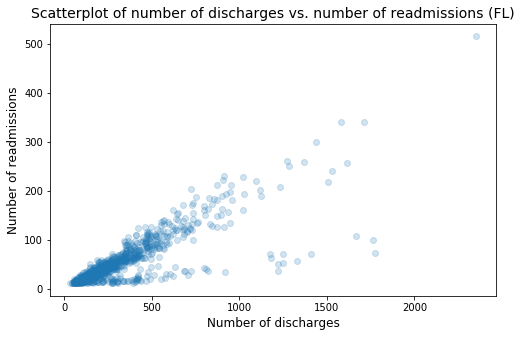

In [11]:
# make data frame for FL
fl_df = clean_hospital_read_df[clean_hospital_read_df['State'] == 'FL']

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(tx_df['Number of Discharges'], tx_df['Number of Readmissions'], alpha = 0.2)

ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Number of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. number of readmissions (FL)', fontsize=14)

## Observations

- After looking at the number of discharges versus the number of readmissions for the top 3 states with the most hospitals (CA, TX, and FL) it looks like the trend we noticed above is prevalant on a state-level as well. 

- Now what distinguishes these two groups?

In [12]:
# create new column that shows boolean if Excess Readmission Ratio is greater than 1.0, want to explore if this may play a role with the two groups
greater_than_1_ERA_CA = ca_df['Excess Readmission Ratio'] > 1.0
ca_df['Excess Readmission Ratio > 1.0'] = greater_than_1_ERA_CA

/Users/joeai/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Excess Readmission Ratio > 1.0
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

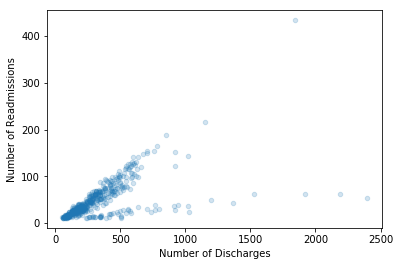

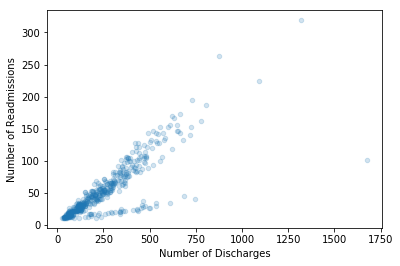

In [13]:
ca_df.groupby(by='Excess Readmission Ratio > 1.0').plot(x='Number of Discharges', y='Number of Readmissions', kind = 'scatter', alpha=0.2)


# Observation

- This effect still applies even when we group by the excess readmission ratio (with one group be greater than 1.0 and the other being less than). There must be another underlying factor we're not accounting for. 

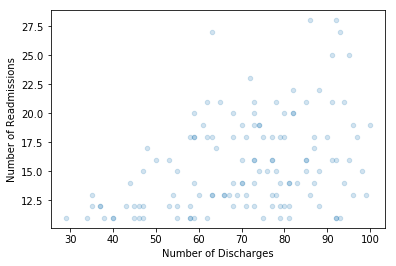

In [14]:
less_than_100_discharges_bool = ca_df['Number of Discharges'] <= 100
ca_df[less_than_100_discharges_bool].plot(x='Number of Discharges', y='Number of Readmissions', kind = 'scatter', alpha=0.2)

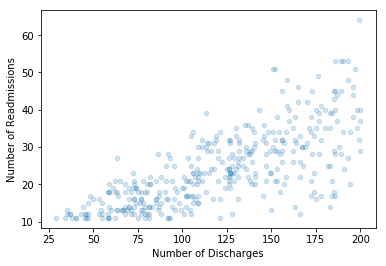

In [15]:
less_than_200_discharges_bool = ca_df['Number of Discharges'] <= 200
ca_df[less_than_200_discharges_bool].plot(x='Number of Discharges', y='Number of Readmissions', kind = 'scatter', alpha=0.2)

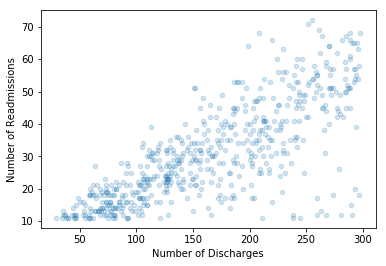

In [16]:
less_than_300_discharges_bool = ca_df['Number of Discharges'] <= 300
ca_df[less_than_300_discharges_bool].plot(x='Number of Discharges', y='Number of Readmissions', kind = 'scatter', alpha=0.2)

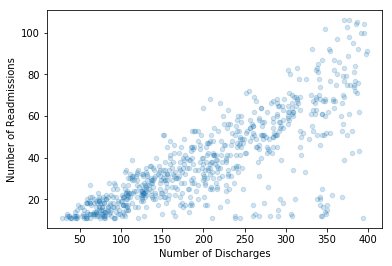

In [17]:
less_than_400_discharges_bool = ca_df['Number of Discharges'] <= 400
ca_df[less_than_400_discharges_bool].plot(x='Number of Discharges', y='Number of Readmissions', kind = 'scatter', alpha=0.2)

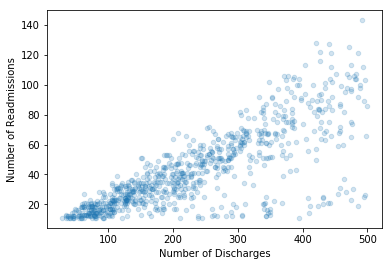

In [18]:
less_than_500_discharges_bool = ca_df['Number of Discharges'] <= 500
ca_df[less_than_500_discharges_bool].plot(x='Number of Discharges', y='Number of Readmissions', kind = 'scatter', alpha=0.2)

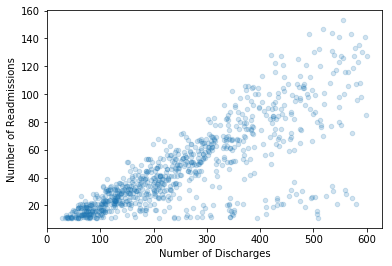

In [19]:
less_than_600_discharges_bool = ca_df['Number of Discharges'] <= 600
ca_df[less_than_600_discharges_bool].plot(x='Number of Discharges', y='Number of Readmissions', kind = 'scatter', alpha=0.2)

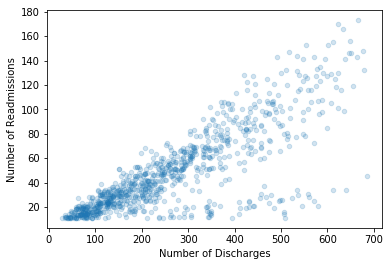

In [20]:
less_than_700_discharges_bool = ca_df['Number of Discharges'] <= 700
ca_df[less_than_700_discharges_bool].plot(x='Number of Discharges', y='Number of Readmissions', kind = 'scatter', alpha=0.2)

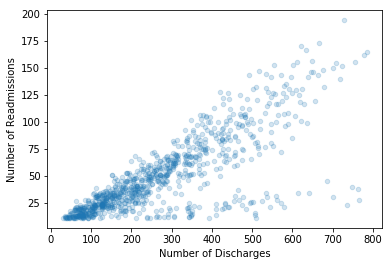

In [21]:
less_than_800_discharges_bool = ca_df['Number of Discharges'] <= 800
ca_df[less_than_800_discharges_bool].plot(x='Number of Discharges', y='Number of Readmissions', kind = 'scatter', alpha=0.2)

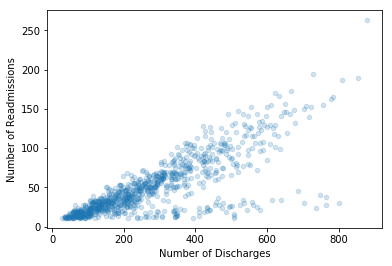

In [22]:
less_than_900_discharges_bool = ca_df['Number of Discharges'] <= 900
ca_df[less_than_900_discharges_bool].plot(x='Number of Discharges', y='Number of Readmissions', kind = 'scatter', alpha=0.2)

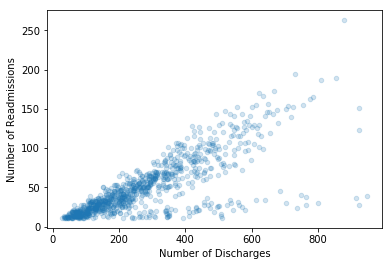

In [23]:
less_than_1000_discharges_bool = ca_df['Number of Discharges'] <= 1000
ca_df[less_than_1000_discharges_bool].plot(x='Number of Discharges', y='Number of Readmissions', kind = 'scatter', alpha=0.2)

## Observations

- By breaking down the observations by the number of discharges from 100 up to 1000 (subsequently increasing by 100) we see something happening. It looks like the hospitals with smaller number of discharges look to be in the 'higher slope' group we originally observed. We're getting closer.

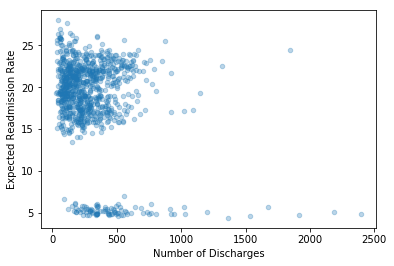

In [24]:
ca_df.plot(x='Number of Discharges', y = 'Expected Readmission Rate', kind = 'scatter', alpha = 0.3)

## Observation

- We may have found a breakthrough here. It looks like, by comparing the number of discharges against the expected readmission rate, that there appears to be two tiers of hospitals, one with an expected readmission rate between 15 and 25 and another tier that has an expected readmission rate that hovers around 5.

Text(0.5, 1.0, 'Histogram of Expected Readmission Rate')

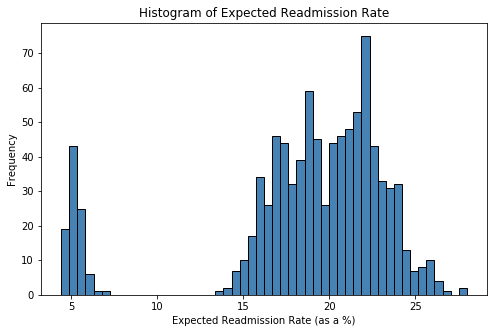

In [25]:
read_rate_hist_ca = ca_df['Expected Readmission Rate'].plot(bins = 50, kind = 'hist', color = 'steelblue', edgecolor = 'black', figsize=(8,5))
read_rate_hist_ca.set_xlabel('Expected Readmission Rate (as a %)')
read_rate_hist_ca.set_title('Histogram of Expected Readmission Rate', fontsize = 'large')

### Observations

As we can see from the histogram above, we can see that there does indeed look like to distinct tiers of hospitals with one set having an expected readmission rate ~5% and another tier having a rate of approximately between 15 and 25%. 

We need to dive a little deeper to find out what distinguishes these groups. 

But before we go any further, let's see if this trend continues on a national level.

Text(0.5, 1.0, 'Histogram of Expected Readmission Rate (National)')

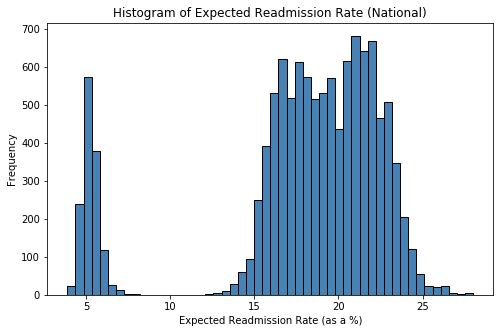

In [26]:
national_read_rate_hist = clean_hospital_read_df['Expected Readmission Rate'].plot(bins = 50, kind = 'hist', color = 'steelblue', edgecolor = 'black', figsize=(8,5))
national_read_rate_hist.set_xlabel('Expected Readmission Rate (as a %)')
national_read_rate_hist.set_title('Histogram of Expected Readmission Rate (National)', fontsize = 'large')

In [27]:
# create data set of hospitals with Expected Readmission Rate greater than 10
bool_ca_read_greater_10 = ca_df['Expected Readmission Rate'] > 10.0
ca_read_rate_greater_10_df = ca_df[bool_ca_read_greater_10]

# create data set of hospitals with Expected Readmission Rate less than 10
bool_ca_read_less_10 = ca_df['Expected Readmission Rate'] < 10.0
ca_read_rate_less_10_df = ca_df[bool_ca_read_less_10]

### Focusing on Hospitals with Expected Readmission Rate > 10%

In [28]:
ca_read_rate_greater_10_df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date',
       'Excess Readmission Ratio > 1.0'],
      dtype='object')

Text(0.5, 1.0, 'Excess Readmission Ratio of CA Hospitals with Expected Readmission Rate > 10%')

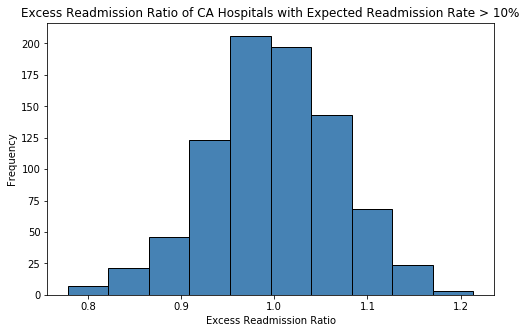

In [29]:
hist_1 = ca_read_rate_greater_10_df['Excess Readmission Ratio'].plot(kind = 'hist', color = 'steelblue', edgecolor = 'black', figsize=(8,5))
hist_1.set_xlabel('Excess Readmission Ratio')
hist_1.set_title('Excess Readmission Ratio of CA Hospitals with Expected Readmission Rate > 10%')

In [30]:
# mean Excess readmission Ratio of hospitals w/ ERR > 10%
print('The mean Excess Readmission Ratio of hospitals with Expected Readmission rate > 10%: ', np.mean(ca_read_rate_greater_10_df['Excess Readmission Ratio']))

The mean Excess Readmission Ratio of hospitals with Expected Readmission rate > 10%:  0.998667780429594


In [31]:
ca_read_rate_greater_10_df.shape

(838, 13)

Text(0.5, 1.0, 'Number of Discharges of CA Hospitals with ERR > 10%')

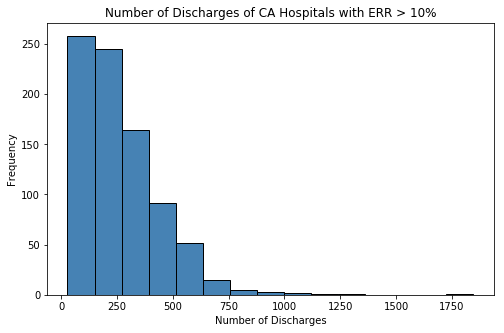

In [32]:
# distribution of the number of discharges of hospitals w/ ERR > 10%
hist_2 = ca_read_rate_greater_10_df['Number of Discharges'].plot(kind='hist', bins = 15, color = 'steelblue', edgecolor = 'black', figsize=(8,5))
hist_2.set_xlabel('Number of Discharges')
hist_2.set_title('Number of Discharges of CA Hospitals with ERR > 10%', fontsize = 'large')

### Focusing on Hospitals with Expected Readmission Rate < 10%

In [33]:
ca_read_rate_less_10_df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date',
       'Excess Readmission Ratio > 1.0'],
      dtype='object')

Text(0.5, 1.0, 'Number of Discharges of CA Hospitals with ERR > 10%')

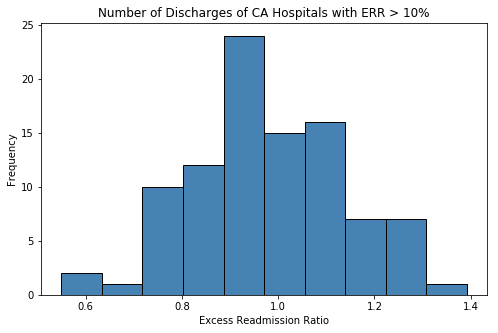

In [34]:
# histogram of Excess Readmission Ratio of CA hospitals with ERR < 10%
hist_ca_3 = ca_read_rate_less_10_df['Excess Readmission Ratio'].plot(kind = 'hist', color = 'steelblue', edgecolor = 'black', figsize=(8,5))
hist_ca_3.set_xlabel('Excess Readmission Ratio')
hist_ca_3.set_title('Number of Discharges of CA Hospitals with ERR > 10%', fontsize = 'large')


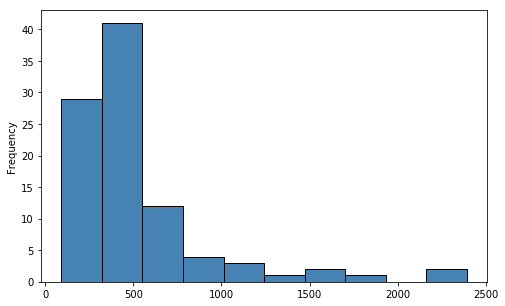

In [35]:
ca_read_rate_less_10_df['Number of Discharges'].plot(kind = 'hist', color = 'steelblue', edgecolor = 'black', figsize=(8,5))

In [36]:
ca_read_rate_less_10_df.shape

(95, 13)

### Observations

So it looks like we may have some contradicting data here, need to compare it against the national average.

In [37]:
# create data set of national hospitals with Expected Readmission Rate greater than 10
bool_nat_read_greater_10 = clean_hospital_read_df['Expected Readmission Rate'] > 10.0
nat_read_rate_greater_10_df = clean_hospital_read_df[bool_nat_read_greater_10]

# create data set of national hospitals with Expected Readmission Rate less than 10
bool_nat_read_less_10 = clean_hospital_read_df['Expected Readmission Rate'] < 10.0
nat_read_rate_less_10_df = clean_hospital_read_df[bool_nat_read_less_10]

Text(0.5, 1.0, 'Excess Readmission Ratio of Hospitals (nationally) with Expected Readmission Rate > 10%')

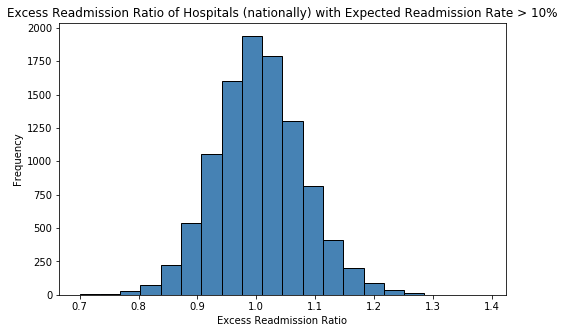

In [38]:
hist_nat_1 = nat_read_rate_greater_10_df['Excess Readmission Ratio'].plot(bins = 20, kind = 'hist', color = 'steelblue', edgecolor = 'black', figsize=(8,5))
hist_nat_1.set_xlabel('Excess Readmission Ratio')
hist_nat_1.set_title('Excess Readmission Ratio of Hospitals (nationally) with Expected Readmission Rate > 10%')

In [39]:
# mean Excess readmission Ratio of hospitals nationally w/ ERR > 10%
print('The mean Excess Readmission Ratio of hospitals nationally with Expected Readmission rate > 10%: ', np.mean(nat_read_rate_greater_10_df['Excess Readmission Ratio']))
print('The standard deviation of Excess Readmission Ratio of hospitals nationally with Expected Readmission rate > 10%: ', np.std(nat_read_rate_greater_10_df['Excess Readmission Ratio']))

The mean Excess Readmission Ratio of hospitals nationally with Expected Readmission rate > 10%:  1.0047614062808548
The standard deviation of Excess Readmission Ratio of hospitals nationally with Expected Readmission rate > 10%:  0.07509275903026118


Text(0.5, 1.0, 'Excess Readmission Ratio of Hospitals (nationally) with Expected Readmission Rate < 10%')

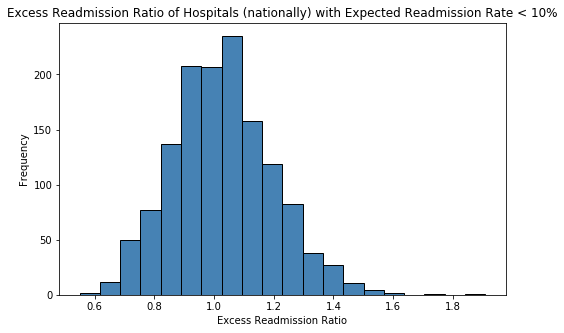

In [40]:
# hist of excess readmission ratio of hospitals nationally with expected Readmission Rate < 10%
hist_nat_2 = nat_read_rate_less_10_df['Excess Readmission Ratio'].plot(bins = 20, kind = 'hist', color = 'steelblue', edgecolor = 'black', figsize=(8,5))
hist_nat_2.set_xlabel('Excess Readmission Ratio')
hist_nat_2.set_title('Excess Readmission Ratio of Hospitals (nationally) with Expected Readmission Rate < 10%')

In [41]:
# mean & std Excess readmission Ratio of hospitals nationally w/ ERR > 10%
print('The mean Excess Readmission Ratio of hospitals nationally with Expected Readmission rate < 10%: ', np.mean(nat_read_rate_less_10_df['Excess Readmission Ratio']))
print('The standard deviation of Excess Readmission Ratio of hospitals nationally with Expected Readmission rate < 10%: ', np.std(nat_read_rate_less_10_df['Excess Readmission Ratio']))

The mean Excess Readmission Ratio of hospitals nationally with Expected Readmission rate < 10%:  1.0277585703865788
The standard deviation of Excess Readmission Ratio of hospitals nationally with Expected Readmission rate < 10%:  0.16971299333602485


## Comparing Predicted Readmission Rate vs. Expected Readmission Rate (in CA)

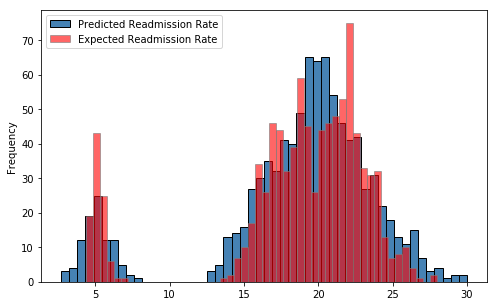

In [42]:
ca_df['Predicted Readmission Rate'].plot(bins = 50, kind = 'hist', color = 'steelblue', edgecolor = 'black', figsize=(8,5))
ca_df['Expected Readmission Rate'].plot(bins = 50, kind = 'hist', color = 'red', edgecolor = 'grey', figsize=(8,5), alpha = 0.6)
plt.legend(loc='upper left')

In [43]:
print(np.mean(ca_df['Predicted Readmission Rate']))
print(np.mean(ca_df['Expected Readmission Rate']))

18.600321543408377
18.620364415862813


#### Calculating test statistic for difference in the Predicted Readmission Rate (in CA)

In [44]:
# get mean predicted readmission rate for hospitals with ERR > 10% & < 10%
err_greater_10_mean = np.mean(ca_read_rate_greater_10_df['Predicted Readmission Rate'])
err_less_10_mean = np.mean(ca_read_rate_less_10_df['Predicted Readmission Rate'])
print(err_greater_10_mean, err_less_10_mean)

# get standard devation of the predicted readmission rates
err_greater_10_std = np.std(ca_read_rate_greater_10_df['Predicted Readmission Rate'])
err_less_10_std = np.std(ca_read_rate_less_10_df['Predicted Readmission Rate'])

print('The difference between the two mean predicted readmission rates is ', err_greater_10_mean - err_less_10_mean)

# calculate mean predicted readmission rate for all of CA
ca_err_mean = (err_greater_10_mean + err_less_10_mean) / 2
print('The mean of Predicted Readmission Rate in CA is ', ca_err_mean)

# calculate the standard deviation of CA
ca_err_std = np.std(ca_df['Predicted Readmission Rate'])
print('The standard deviation for Predicted Readmission Rate in CA is ', ca_err_std)

ca_test_statistic = (err_greater_10_mean - err_less_10_mean - 0) / ca_err_std
print('The test statistic for CA is', ca_test_statistic)

20.125536992840104 5.146315789473684
The difference between the two mean predicted readmission rates is  14.97922120336642
The mean of Predicted Readmission Rate in CA is  12.635926391156893
The standard deviation for Predicted Readmission Rate in CA is  5.45760528221292
The test statistic for CA is 2.7446508915156884


### Observations for CA

Our test statistic was equal to ~2.745. As stated in the introduction our signficance level, 𝛼, is equal to 0.01. Our null hypothesis was that the mean predicted readmission rate was the same between the two tiers of hospitals. After calculating the test statistic though, giving us a p-value of 0.003026 which is less than 0.01, we are able to reject the null hypothesis that the mean predicted readmission rate is the same in this population (at least for CA). 

Our next step will be to compare this on a national level and see if it holds there as well.

## Comparing Predicted Readmission Rate vs. Expected Readmission Rate (nationally)

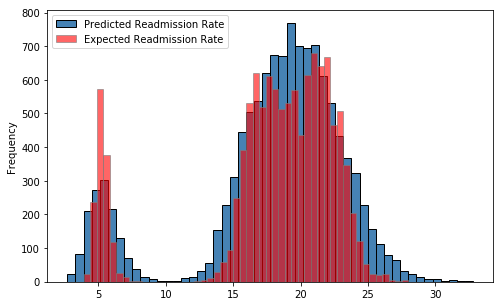

In [45]:
clean_hospital_read_df['Predicted Readmission Rate'].plot(bins = 50, kind = 'hist', color = 'steelblue', edgecolor = 'black', figsize=(8,5))
clean_hospital_read_df['Expected Readmission Rate'].plot(bins = 50, kind = 'hist', color = 'red', edgecolor = 'grey', figsize=(8,5), alpha = 0.6)
plt.legend(loc='upper left')

In [46]:
print(np.mean(clean_hospital_read_df['Predicted Readmission Rate']))
print(np.mean(clean_hospital_read_df['Expected Readmission Rate']))

17.984291554318496
17.865695398799723


In [47]:
# get mean predicted readmission rate for hospitals with ERR > 10% & < 10%
nat_err_greater_10_mean = np.mean(nat_read_rate_greater_10_df['Predicted Readmission Rate'])
nat_err_less_10_mean = np.mean(nat_read_rate_less_10_df['Predicted Readmission Rate'])
print(nat_err_greater_10_mean, nat_err_less_10_mean)

# get standard devation of the predicted readmission rates
nat_err_greater_10_std = np.std(nat_read_rate_greater_10_df['Predicted Readmission Rate'])
nat_err_less_10_std = np.std(nat_read_rate_less_10_df['Predicted Readmission Rate'])

print('The difference between the two mean predicted readmission rates is ', nat_err_greater_10_mean - nat_err_less_10_mean)

# calculate mean predicted readmission rate nationally
nat_err_mean = (nat_err_greater_10_mean + nat_err_less_10_mean) / 2
print('The mean of Predicted Readmission Rate nationally is ', nat_err_mean)

# calculate the standard deviation nationally
nat_err_std = np.std(clean_hospital_read_df['Predicted Readmission Rate'])
print('The standard deviation for Predicted Readmission Rate nationally is ', nat_err_std)

nat_test_statistic = (nat_err_greater_10_mean - nat_err_less_10_mean - 0) / nat_err_std
print('The test statistic nationally is', nat_test_statistic)

19.683320165909546 5.435521517140766
The difference between the two mean predicted readmission rates is  14.247798648768779
The mean of Predicted Readmission Rate nationally is  12.559420841525156
The standard deviation for Predicted Readmission Rate nationally is  5.487412141562629
The test statistic nationally is 2.596451347412642


### Observations nationally

Our test statistic was equal to ~2.596. As stated in the introduction our signficance level, 𝛼, is equal to 0.01. Our null hypothesis was that the mean predicted readmission rate was the same between the two tiers of hospitals. After calculating the test statistic though, giving us a p-value of 0.004716 which is less than 0.01, we are able to reject the null hypothesis that the mean predicted readmission rate is the same nationally. 

What are the implications here? While I believe there could be a lot more analysis done, I think at this point we would be able to start exploring the potential for judging hospitals not necessarily in regards to the absolute number of discharges but instead on their Predicted Readmission Rate. 

In regards to the number of discharges, this number can be impacted by local events that may be hard to observe on a national scale, thus inflating the numbers and causing what would have otherwise been a 'good' hospital to have an abnormally high number of discharges any given month. 

For this reason I believe the Predicted Readmission Rate, which is a 30-day average of readmissions for heart attack, heart failure, and pneumonia, would be a better indicator to focus on. Further, since there appears to be two tiers of hospitals it may be better to group hospitals into their respective tiers, allowing for better comparison since you aren't comparing 'apples and oranges' so to speak.

Where further analysis may be needed is in regards to the specifics of why there are two groups and the distinguishing variables that separate one group from the other. This would allow for further initiatives to be launched that can be specially crafted to depending on which tier the hospital falls into.

### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?



Statistical Significance and Practical Significance: A definition

Where statistical signficance comes into play is the hypothesis testing procedure. With hypothesis testing, you are trying to see whether the results that you got are likely assuming that the null hypothesis is correct for the population as a whole. If the results are sufficiently improbably under that assumption, then you can reject the null hypothesis and conclude that an effect exists and that it was due to chance. This essentially means is our p-value more or less than our signficance value? If the p-value (which is essentially a probability) is less than the significance value (which we set prior to our test, and in this case was equal to 0.01) than we are able to reject the null hypothesis; if it isn't we can't reject it. 

So statistical significance indicates only that you have sufficient evidence to conclude that an effect exists. It is a mathematical definition that does not know anything about the subject area and what constitutes and important effect.

While statistical significance focuses on determining if an effect exists, practical significance refers to the magnitude of the effect. Something can be statistically significant but is its magnitude (i.e. practical significance) large enough that doing something based on those results worth the time, energy, and potentially, capital?

In other words, not all statistically significant differences are interesting!

In regards to this problem, changing the excess readmission ratio a few points may seem menial from an absolute standpoint, but in reality can the effects can be pretty sizable expecially if you are over 1.00. Remember, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions (i.e. those that are above 1.00). So being able to accurately access this variable is crucial as being over the limit will have a direct impact on that hospitals revenue, and thus its ability to carry out effective care. 

I believe my recommendation to focus on the predicted readmission rate versus the absolute number of discharges is a more reliable indicator of a hospitals effectiveness. If said hospital experiences an abnormal month in terms of readmissions, then the hospital won't necessarily be punished. However, if this becomes a consistent pattern, driving up that ratio, it'll allow CMS greater ability to recognize hospitals that are consistently good as well as those who have some work to do in terms of driving down their excess readmissions. 

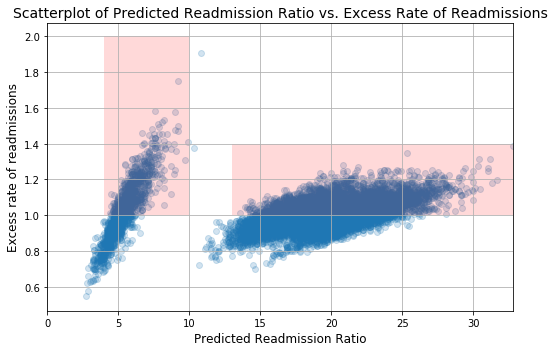

In [48]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Predicted Readmission Rate'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([4,10], 1, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([13,35], 1, 1.4, facecolor='red', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Predicted Readmission Ratio', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of Predicted Readmission Ratio vs. Excess Rate of Readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()